# Titanic Dataset Explor

## get libs ready

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%run /Users/yaoyao/Documents/datascience/toolbox/toolbox1_dataview.ipynb
%matplotlib inline

## readin training data

In [41]:
with open('train.csv') as f:
    df = pd.read_csv(f)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#basicinfo(df) #age, embarked,Cabin has missing values
# fix age missing values.embarked
def prepro(df):
    df.Age.fillna(0,inplace=True)
    df.Embarked.fillna(method='ffill',inplace=True)
    return df

In [43]:
#preprocess dtrain
df_train = prepro(df)

## Model Train

In [52]:
def RFTrain(X,Y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    
    (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,random_state = 1)
    clf = RandomForestClassifier().fit(X_train, Y_train)
    return clf, X_test, Y_test

# Run and Evaluate

/Users/yaoyao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

       not 1       0.75      0.91      0.82       128
           1       0.82      0.59      0.69        95

    accuracy                           0.77       223
   macro avg       0.79      0.75      0.75       223
weighted avg       0.78      0.77      0.76       223



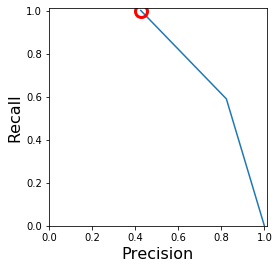

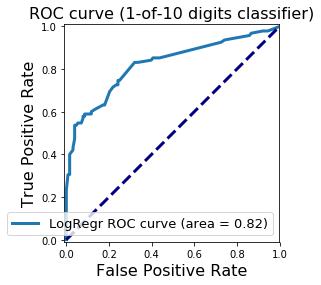

In [67]:
# select input features
features = ['Pclass','Sex','SibSp','Parch','Embarked']
# prepare Xtrain data
X = pd.get_dummies(df_train[features])
Y = df_train['Survived']
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
    
# (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,random_state = 1)
#clf = RandomForestClassifier().fit(X_train, Y_train)
# model train
clf1,X_test1,Y_test1 = RFTrain(X,Y)
# model evaluation
EvaluateModel(clf1, X_test1, Y_test1)

/Users/yaoyao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

       not 1       0.78      0.91      0.84       128
           1       0.84      0.65      0.73        95

    accuracy                           0.80       223
   macro avg       0.81      0.78      0.79       223
weighted avg       0.80      0.80      0.79       223



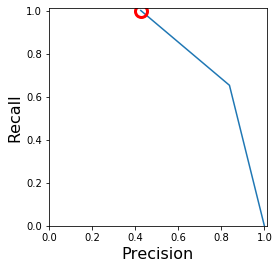

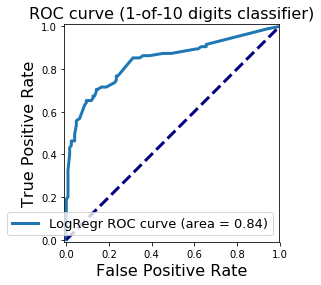

In [66]:
# select input features
features = ['Pclass','Sex','SibSp','Age']
# prepare Xtrain data
X = pd.get_dummies(df_train[features])
Y = df_train['Survived']
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
    
# (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,random_state = 1)
clf = RandomForestClassifier(n_estimators=100,max_depth=3).fit(X_train, Y_train)
# model train
clf1,X_test1,Y_test1 = RFTrain(X,Y)
# model evaluation
EvaluateModel(clf, X_test, Y_test)

/Users/yaoyao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/yaoyao/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

       not 1       0.78      0.90      0.83       128
           1       0.83      0.65      0.73        95

    accuracy                           0.79       223
   macro avg       0.80      0.78      0.78       223
weighted avg       0.80      0.79      0.79       223



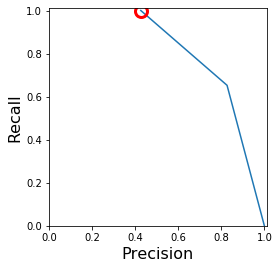

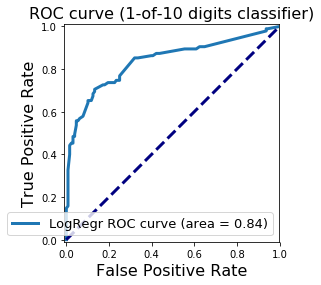

In [78]:
# select classify age
features = ['Pclass','Sex','SibSp','Age']
X_temp = df_train[features]
X_temp['Age'] = X_temp['Age'].map(lambda x: 1 if x >= 18 else 0)
# prepare Xtrain data
X = pd.get_dummies(X_temp)
Y = df_train['Survived']
clf = RandomForestClassifier(n_estimators=100,max_depth=3).fit(X_train, Y_train)
clf1,X_test1,Y_test1 = RFTrain(X,Y)
EvaluateModel(clf, X_test, Y_test)

              precision    recall  f1-score   support

       not 1       0.75      0.89      0.82       128
           1       0.81      0.61      0.69        95

    accuracy                           0.77       223
   macro avg       0.78      0.75      0.76       223
weighted avg       0.78      0.77      0.76       223



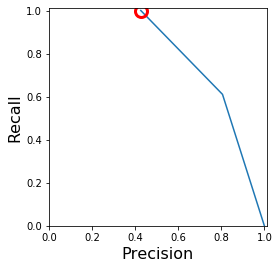

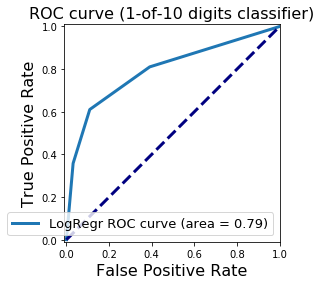

In [82]:
# select input features
features = ['Pclass','Sex','SibSp','Age']
# prepare Xtrain data
X = pd.get_dummies(df_train[features])
Y = df_train['Survived']

def KNRTrain(X,Y):
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    
    (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,random_state = 1)
    clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
    return clf, X_test, Y_test

clf2,X_test2,Y_test2 = KNRTrain(X,Y)
# model evaluation
EvaluateModel(clf2, X_test2, Y_test2)

In [85]:
# select input features
features = ['Pclass','Sex','SibSp','Age']
# prepare Xtrain data
X = pd.get_dummies(df_train[features])
Y = df_train['Survived']

def LNRTrain(X,Y):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    
    (X_train,X_test,Y_train,Y_test) = train_test_split(X,Y,random_state = 1)
    clf = LinearRegression().fit(X_train,Y_train)
    return clf, X_test, Y_test

clf2,X_test2,Y_test2 = LNRTrain(X,Y)
# model evaluation
#EvaluateModel(clf2, X_test2, Y_test2)

ValueError: shapes (223,8) and (5,) not aligned: 8 (dim 1) != 5 (dim 0)